# Dataset Processing

## Dataset Information

###  IRIS
- 4228 pairs of thermal and rgb images
- 30 individuals
- 3 expressions:  surprised, laughing, angry (ex1, ex2, ex3)
- 5 illuminations: neutral facial expressions

### KTFE
- 3190 pairs of thermal and rgb images 
- 30 individuals
- emotions: Suprise, happiness, anger, neutral, sadness, fear, disgust


### Final Quantity before augmentation (raw data)
- KTFE: 3193
- IRIS: 946
### Final Quantity after augmentation
- 33104 (16552 per dataset)

## 1. Imports

In [1]:
import os
import shutil
import cv2
from skimage.transform import rotate
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt  

## 2. Load datasets and preprocess

In [2]:
#create thermal folder if it doesnt exist
thermal = r"Data/Thermal"
rgb = r"Data/RGB"
if not os.path.exists(thermal):
    os.makedirs(thermal)
if not os.path.exists(rgb):
    os.makedirs(rgb)

#create augmentation folders if it doesnt exist
thermalAug = r"Data/ThermalAug"
rgbAug = r"Data/RgbAug"
if not os.path.exists(thermalAug):
    os.makedirs(thermalAug)
if not os.path.exists(rgbAug):
    os.makedirs(rgbAug)

### 2.1 Function to resize images

In [3]:
def resizeImg(source, f):
    rePath = os.path.join(source, f)
    reImage = Image.open(rePath)
    reImage = reImage.resize((224, 224)) #for VIT
    reImage.save(rePath)
    return rePath

### 2.2 IRIS

In [4]:
#Paths
pathSearch = "./IRIS"
source = './'


#to rename files to Suprised
tNumber = 1
rNumber = 1

for root, dirs, files in os.walk(pathSearch): 
    for directory in dirs: #go through each folder
        if directory == 'exp1' or directory == 'ex1': #gets only ex1 (suprised)
            folderPath1 = os.path.join(root, directory) 
            for file in os.listdir(folderPath1):
                if 'L-' in file and 'Thumbs' not in file: #gets the thermal
                    oldName = os.path.join(folderPath1, file)
                    newName = f'T_Surprised_{tNumber}_IRIS.bmp'
                    tNumber += 1 
                    os.rename(oldName, newName) #renames

                if 'V-' in file and 'Thumbs' not in file: #gets the rgb
                    oldName = os.path.join(folderPath1, file)
                    newName = f'R_Surprised_{rNumber}_IRIS.bmp'
                    os.rename(oldName, newName)
                    rNumber += 1

        if directory == 'exp2' or directory == 'ex2': #gets only ex2 (happy)
            folderPath1 = os.path.join(root, directory) 
            for file in os.listdir(folderPath1):
                if 'L-' in file and 'Thumbs' not in file:
                    oldName = os.path.join(folderPath1, file)
                    newName = f'T_Happy_{tNumber}_IRIS.bmp'
                    tNumber += 1 
                    os.rename(oldName, newName)

                if 'V-' in file and 'Thumbs' not in file:
                    oldName = os.path.join(folderPath1, file)
                    newName = f'R_Happy_{rNumber}_IRIS.bmp'
                    os.rename(oldName, newName)
                    rNumber += 1
           

        if directory == 'exp3' or directory == 'ex3': #gets only ex3 (angry)
            folderPath1 = os.path.join(root, directory) 
            for file in os.listdir(folderPath1):
                if 'L-' in file and 'Thumbs' not in file:
                    oldName = os.path.join(folderPath1, file)
                    newName = f'T_Angry_{tNumber}_IRIS.bmp'
                    os.rename(oldName, newName)
                    tNumber += 1 

                if 'V-' in file and 'Thumbs' not in file:
                    oldName = os.path.join(folderPath1, file)
                    newName = f'R_Angry_{rNumber}_IRIS.bmp'
                    os.rename(oldName, newName)
                    rNumber += 1
            rawIRIS = file


                    
#move the thermal files
files = os.listdir(source)
for f in files:
    if 'T_' in f:
        rePath = resizeImg(source, f)
        shutil.move(rePath, thermal)
        

#move the rgb files
files = os.listdir(source)
for f in files:
    if 'R_' in f:
        rePath = resizeImg(source, f)
        shutil.move(rePath, rgb)


### 2.3 KTFE

In [6]:
#Paths
pathSearchK = "./KTFE"
source = './'

ktfeT = 1
ktfeR = 1

for root, dirs, files in os.walk(pathSearchK): 
    for directory in dirs: #go through each folder
     
        if directory == 'images': #gets the images in each thermal and rgb folder
            ktfePath = os.path.join(root, directory) 
            for file in os.listdir(ktfePath):
                if 'IR' in file: #gets the thermal
                    if 'anger' in file or 'angry' in file: #anger
                        oldName = os.path.join(ktfePath, file)
                        newName = f'T_Angry_{ktfeT}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeT += 1
                    if 'disgust' in file: #disgust
                        oldName = os.path.join(ktfePath, file)
                        newName = f'T_Disgust_{ktfeT}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeT += 1
                    if 'fear' in file: #fear
                        oldName = os.path.join(ktfePath, file)
                        newName = f'T_Fear_{ktfeT}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeT += 1
                    if 'happy' in file: #happy
                        oldName = os.path.join(ktfePath, file)
                        newName = f'T_Happy_{ktfeT}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeT += 1
                    if 'neutral' in file: #neutral
                        oldName = os.path.join(ktfePath, file)
                        newName = f'T_Neutral_{ktfeT}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeT += 1
                    if 'sad' in file: #sad
                        oldName = os.path.join(ktfePath, file)
                        newName = f'T_Sad_{ktfeT}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeT += 1
                    if 'suprise' in file or 'Suprise' in file or 'surprise' in file or 'Surprise' in file: #suprise
                        oldName = os.path.join(ktfePath, file)
                        newName = f'T_Surprised_{ktfeT}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeT += 1
     
            for file in os.listdir(ktfePath):
                if 'VR' in file: #gets the rgb
                    if 'anger' in file or 'angry' in file: #anger
                        oldName = os.path.join(ktfePath, file)
                        newName = f'R_Angry_{ktfeR}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeR += 1
                    if 'disgust' in file: #disgust
                        oldName = os.path.join(ktfePath, file)
                        newName = f'R_Disgust_{ktfeR}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeR += 1
                    if 'fear' in file: #fear
                        oldName = os.path.join(ktfePath, file)
                        newName = f'R_Fear_{ktfeR}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeR += 1
                    if 'happy' in file: #happy
                        oldName = os.path.join(ktfePath, file)
                        newName = f'R_Happy_{ktfeR}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeR += 1
                    if 'neutral' in file: #neutral
                        oldName = os.path.join(ktfePath, file)
                        newName = f'R_Neutral_{ktfeR}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeR += 1
                    if 'sad' in file: #sad
                        oldName = os.path.join(ktfePath, file)
                        newName = f'R_Sad_{ktfeR}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeR += 1
                    if 'suprise' in file or 'Suprise' in file or 'surprise' in file or 'Surprise' in file:
                        oldName = os.path.join(ktfePath, file)
                        newName = f'R_Surprised_{ktfeR}_KTFE.jpg'
                        os.rename(oldName, newName)
                        ktfeR += 1
                
                    
#move the thermal files
files = os.listdir(source)
for f in files:
    if 'T_' in f:
        rePath = resizeImg(source, f)
        shutil.move(rePath, thermal)

#move the rgb files
files = os.listdir(source)
for f in files:
    if 'R_' in f:
        rePath = resizeImg(source, f)
        shutil.move(rePath, rgb)

## 3. Augmentation

### 3.1 Thermal

#### 3.1.1 Flip

In [7]:
for file in os.listdir(thermal):
    imgPath = os.path.join(thermal,file)
    img = cv2.imread(imgPath)
    horiz = cv2.flip(img,1)
    fileExt = os.path.splitext(file)[0]
    augPath = os.path.join(thermalAug, f'{fileExt}_flip.jpg')
    cv2.imwrite(augPath, horiz)



#### 3.1.2 Rotate

In [8]:
for file in os.listdir(thermal):
    imgPath = os.path.join(thermal,file)
    img = cv2.imread(imgPath)

    #15 degree rotation
    imgRotatePlus = rotate(img, 15,preserve_range = True)
    uniImgPlus = imgRotatePlus.astype(np.uint8)
    fileExt = os.path.splitext(file)[0]
    augPath = os.path.join(thermalAug, f'{fileExt}_rotate15.jpg')
    cv2.imwrite(augPath, uniImgPlus)

    #-15 degree rotation
    imgRotateNeg = rotate(img, -15,preserve_range = True)
    uniImgNeg = imgRotateNeg.astype(np.uint8)
    fileExt = os.path.splitext(file)[0]
    augPathNeg= os.path.join(thermalAug, f'{fileExt}_rotate15neg.jpg')
    cv2.imwrite(augPathNeg, uniImgNeg)



### 3.1.3 CLAHE

In [9]:
for file in os.listdir(thermal):
    imgPath = os.path.join(thermal,file)
    img = cv2.imread(imgPath)

    bwImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=5)
    claheThermal = cv2.add(bwImage, 30)
    fileExt = os.path.splitext(file)[0]
    augPath = os.path.join(thermalAug, f'{fileExt}_clahe.jpg')
    cv2.imwrite(augPath, claheThermal)

### 3.2 RGB

#### 3.2.1  Flip

In [10]:
for file in os.listdir(rgb):
    imgPath = os.path.join(rgb,file)
    img = cv2.imread(imgPath)
    horiz = cv2.flip(img,1)
    fileExt = os.path.splitext(file)[0]
    augPath = os.path.join(rgbAug, f'{fileExt}_flip.jpg')
    cv2.imwrite(augPath, horiz)


#### 3.2.2 Rotate

In [11]:
for file in os.listdir(rgb):
    imgPath = os.path.join(rgb,file)
    img = cv2.imread(imgPath)

    #15 degree rotation
    imgRotatePlus = rotate(img, 15,preserve_range = True)
    uniImgPlus = imgRotatePlus.astype(np.uint8)
    fileExt = os.path.splitext(file)[0]
    augPath = os.path.join(rgbAug, f'{fileExt}_rotate15.jpg')
    cv2.imwrite(augPath, uniImgPlus)

    #-15 degree rotation
    imgRotateNeg = rotate(img, -15,preserve_range = True)
    uniImgNeg = imgRotateNeg.astype(np.uint8)
    fileExt = os.path.splitext(file)[0]
    augPathNeg= os.path.join(rgbAug, f'{fileExt}_rotate15neg.jpg')
    cv2.imwrite(augPathNeg, uniImgNeg)

### 3.2.3 CLAHE

In [12]:
for file in os.listdir(rgb):
    imgPath = os.path.join(rgb,file)
    img = cv2.imread(imgPath)

    bwImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=5)
    claheRGB = cv2.add(bwImage, 30)
    fileExt = os.path.splitext(file)[0]
    augPath = os.path.join(rgbAug, f'{fileExt}_clahe.jpg')
    cv2.imwrite(augPath, claheRGB)

## 4. Visualisation

### 4.1 Raw Data

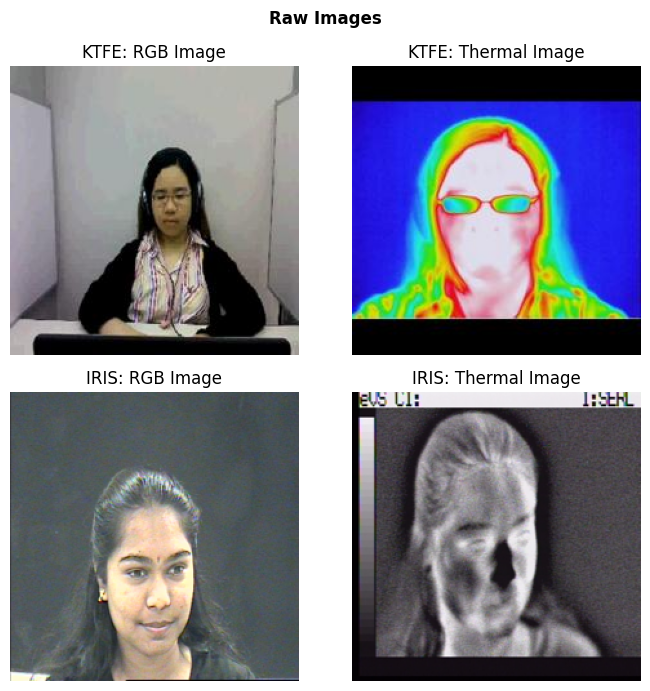

In [15]:
fig = plt.figure(figsize=(7, 7))

#raw KTFE images
rgbKTFEImg = cv2.imread('Data/RGB/R_Angry_26_KTFE.jpg')
rgbKTFEImg = cv2.cvtColor(rgbKTFEImg, cv2.COLOR_BGR2RGB)
thermalKTFEImg = cv2.imread('Data/Thermal/T_Angry_26_KTFE.jpg')
thermalKTFEImg = cv2.cvtColor(thermalKTFEImg, cv2.COLOR_BGR2RGB)

#raw IRIS images
rgbIRISImg = cv2.imread('Data/RGB/R_Angry_623_IRIS.bmp') 
rgbIRISImg = cv2.cvtColor(rgbIRISImg, cv2.COLOR_BGR2RGB)
thermalIRISImg = cv2.imread('Data/Thermal/T_Angry_623_IRIS.bmp')
thermalIRISImg = cv2.cvtColor(thermalIRISImg, cv2.COLOR_BGR2RGB)


plt.subplot(2, 2, 1) 
plt.imshow(rgbKTFEImg)  
plt.axis('off')
plt.title("KTFE: RGB Image") 

plt.subplot(2, 2, 2)
plt.imshow(thermalKTFEImg)  
plt.axis('off')
plt.title("KTFE: Thermal Image") 

plt.subplot(2, 2, 3)
plt.imshow(rgbIRISImg)  
plt.axis('off')
plt.title("IRIS: RGB Image") 


plt.subplot(2, 2, 4)
plt.imshow(thermalIRISImg)  
plt.axis('off')
plt.title("IRIS: Thermal Image") 

plt.suptitle("Raw Images",fontweight="bold")
plt.tight_layout()  

### 4.2 Augmented Data

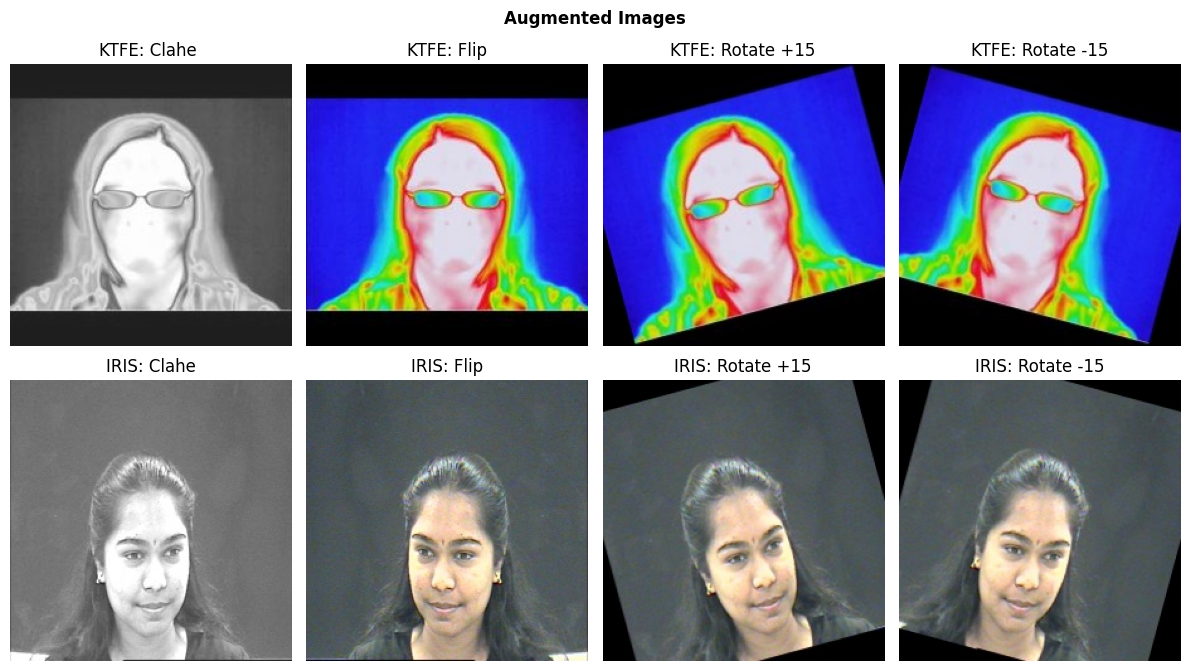

In [16]:
fig = plt.figure(figsize=(12, 7))

#ktfe augmented images
thermalKTFEImg_clahe = cv2.imread('Data/ThermalAug/T_Angry_26_KTFE_clahe.jpg')
thermalKTFEImg_clahe = cv2.cvtColor(thermalKTFEImg_clahe, cv2.COLOR_BGR2RGB)
thermalKTFEImg_flip = cv2.imread('Data/ThermalAug/T_Angry_26_KTFE_flip.jpg')
thermalKTFEImg_flip = cv2.cvtColor(thermalKTFEImg_flip, cv2.COLOR_BGR2RGB)  
thermalKTFEImg_rotate15 = cv2.imread('Data/ThermalAug/T_Angry_26_KTFE_rotate15.jpg')
thermalKTFEImg_rotate15 = cv2.cvtColor(thermalKTFEImg_rotate15, cv2.COLOR_BGR2RGB)  
thermalKTFEImg_rotate15neg = cv2.imread('Data/ThermalAug/T_Angry_26_KTFE_rotate15neg.jpg')      
thermalKTFEImg_rotate15neg = cv2.cvtColor(thermalKTFEImg_rotate15neg, cv2.COLOR_BGR2RGB)

#iris augmented images
rgbIRISImg_clahe = cv2.imread('Data/RgbAug/R_Angry_623_IRIS_clahe.jpg')
rgbIRISImg_clahe = cv2.cvtColor(rgbIRISImg_clahe, cv2.COLOR_BGR2RGB)
rgbIRISImg_flip = cv2.imread('Data/RgbAug/R_Angry_623_IRIS_flip.jpg')
rgbIRISImg_flip = cv2.cvtColor(rgbIRISImg_flip, cv2.COLOR_BGR2RGB)
rgbIRISImg_rotate15 = cv2.imread('Data/RgbAug/R_Angry_623_IRIS_rotate15.jpg')
rgbIRISImg_rotate15 = cv2.cvtColor(rgbIRISImg_rotate15, cv2.COLOR_BGR2RGB)
rgbIRISImg_rotate15neg = cv2.imread('Data/RgbAug/R_Angry_623_IRIS_rotate15neg.jpg')
rgbIRISImg_rotate15neg = cv2.cvtColor(rgbIRISImg_rotate15neg, cv2.COLOR_BGR2RGB)    



#KTFE
plt.subplot(2, 4, 1) 
plt.imshow(thermalKTFEImg_clahe)  
plt.axis('off')
plt.title("KTFE: Clahe ") 

plt.subplot(2, 4, 2)
plt.imshow(thermalKTFEImg_flip)     
plt.axis('off')
plt.title("KTFE: Flip")

plt.subplot(2, 4, 3)
plt.imshow(thermalKTFEImg_rotate15)
plt.axis('off')
plt.title("KTFE: Rotate +15")

plt.subplot(2, 4, 4)
plt.imshow(thermalKTFEImg_rotate15neg)
plt.axis('off')
plt.title("KTFE: Rotate -15")

#IRIS   
plt.subplot(2, 4, 5)    
plt.imshow(rgbIRISImg_clahe)
plt.axis('off')
plt.title("IRIS: Clahe")

plt.subplot(2, 4, 6)
plt.imshow(rgbIRISImg_flip)
plt.axis('off')
plt.title("IRIS: Flip")

plt.subplot(2, 4, 7)
plt.imshow(rgbIRISImg_rotate15)
plt.axis('off')
plt.title("IRIS: Rotate +15")

plt.subplot(2, 4, 8)
plt.imshow(rgbIRISImg_rotate15neg)
plt.axis('off')
plt.title("IRIS: Rotate -15")


plt.suptitle("Augmented Images",fontweight="bold")
plt.tight_layout()